# 0.2.0 Creating and joining GeoDataFrames

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import geopandas as gpd 
from shapely.geometry import Point

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.2.3 Colormaps

In [4]:
school_districts = gpd.read_file(path.data_external_dir("school_districts.geojson"))
school_districts.head(1)

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."


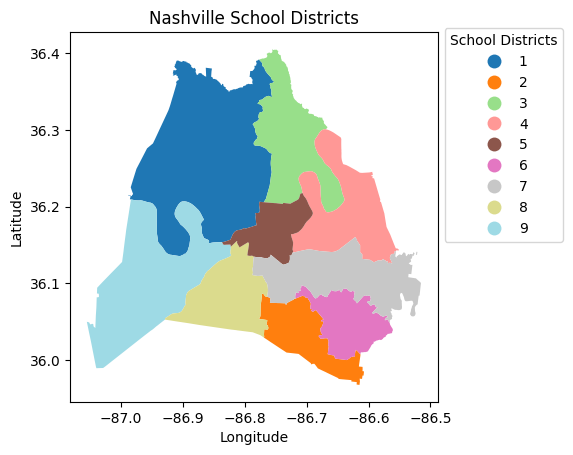

In [5]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using the tab20 colormap (qualitative)
school_districts.plot(column = 'district', cmap = 'tab20', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nashville School Districts')
plt.show();

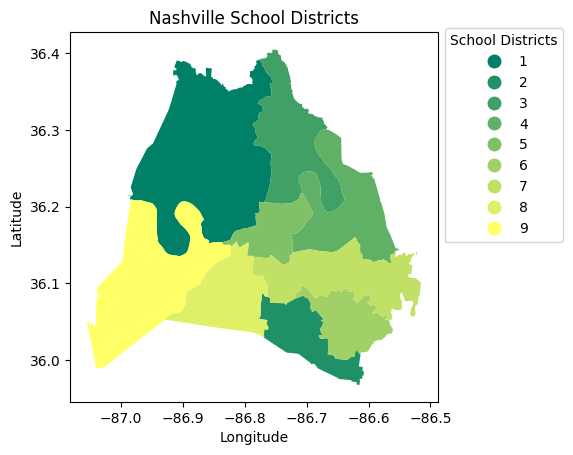

In [6]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using the summer colormap (sequential)
school_districts.plot(column = 'district', cmap = 'summer', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nashville School Districts')
plt.show();

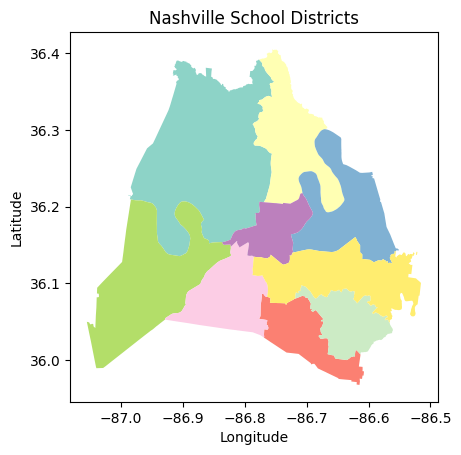

In [7]:
# Set legend style
lgnd_kwds = {'title': 'School Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}

# Plot the school districts using Set3 colormap without the column argument
school_districts.plot(cmap = 'Set3', legend = True, legend_kwds = lgnd_kwds)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nashville School Districts')
plt.show();

## 0.2.4 Map Nashville neighborhoods

In [8]:
neighborhoods = gpd.read_file(path.data_external_dir("neighborhoods.geojson"))
neighborhoods.head(1)

,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."


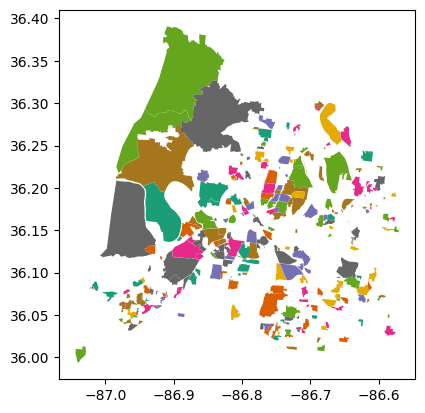

In [9]:
# Plot the neighborhoods, color according to name and use the Dark2 colormap
neighborhoods.plot(column = 'name', cmap = 'Dark2')

# Show the plot.
plt.show()

## 0.2.6 Changing coordinate reference systems

In [10]:
school_districts = gpd.read_file(path.data_external_dir("school_districts.geojson"))
school_districts.head(1)

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."


In [11]:
print(school_districts.crs)

epsg:4326


In [12]:
school_districts.geometry = school_districts.geometry.to_crs(epsg = 3857)
school_districts.head(1)

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-9659344.056 4353528.767, -965..."


In [13]:
print(school_districts.crs)

epsg:3857


## 0.2.7 Construct a GeoDataFrame from a DataFrame

In [14]:
art = pd.read_csv(path.data_raw_dir("public_art.csv"), sep=',')
print(art.info())
art.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            132 non-null    object 
 1   Last Name        132 non-null    object 
 2   First Name       122 non-null    object 
 3   Location         131 non-null    object 
 4   Medium           128 non-null    object 
 5   Type             132 non-null    object 
 6   Description      87 non-null     object 
 7   Latitude         132 non-null    float64
 8   Longitude        132 non-null    float64
 9   Mapped Location  132 non-null    object 
dtypes: float64(2), object(8)
memory usage: 10.4+ KB
None


,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)"
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)"
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.15790,-86.78817,"(36.1579, -86.78817)"
3,A Splash of Color,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn,616 17th Ave. N.,"Steel, brick, wood, and fabric on frostproof c...",Mural,Painted wooden hoop dancer on a twenty foot po...,36.16202,-86.79975,"(36.16202, -86.79975)"
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.16215,-86.78205,"(36.16215, -86.78205)"


In [15]:
# Create a geometry column from lng & lat
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)

# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs = neighborhoods.crs, geometry = art.geometry)
print(type(art_geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


## 0.2.9 Spatial join practice

In [16]:
# Spatially join art_geo and neighborhoods 
art_intersect_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'intersects')

# Print the shape property of art_intersect_neighborhoods
print(art_intersect_neighborhoods.shape)

(40, 13)


In [17]:
# Create art_within_neighborhoods by spatially joining art_geo and neighborhoods
art_within_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'within')

# Print the shape property of art_within_neighborhoods
print(art_within_neighborhoods.shape)

(40, 13)


In [18]:
# Spatially join art_geo and neighborhoods and using the contains op
art_containing_neighborhoods = gpd.sjoin(art_geo, neighborhoods, op = 'contains')

# Print the shape property of art_containing_neighborhoods
print(art_containing_neighborhoods.shape)

(0, 13)


## 0.2.10 Finding the neighborhood with the most public art

In [19]:
# Spatially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, op = "within")

# Print the first few rows
print(neighborhood_art.head())

                                Title Last Name First Name  \
1     [Fourth and Commerce Sculpture]    Walker        Lin   
4                A Story of Nashville    Ridley       Greg   
21                        Chet Atkins     Faxon    Russell   
22  Children's Chairs For The Seasons    McGraw     Deloss   
34                    Foliated Scroll   Bloomer       Kent   

                                             Location  \
1                   333 Commerce Street, Nashville TN   
4                     615 Church Street, Nashville TN   
21  Corner of Fifth Avenue North and Union Street,...   
22                    615 Church Street, Nashville TN   
34                    615 Church Street, Nashville TN   

                                         Medium       Type  \
1                                           NaN  Sculpture   
4                      Hammered copper repousse     Frieze   
21  Bronze stool and guitar on a granite plynth  Sculpture   
22                 Mixed Media - woo

## 0.2.11 Aggregating points within polygons

In [20]:
# Get name and title from neighborhood_art and group by name
neighborhood_art_grouped = neighborhood_art[['name', 'Title']].groupby('name')

# Aggregate the grouped data and count the artworks within each polygon
print(neighborhood_art_grouped.agg('count').sort_values(by = 'Title', ascending = False))

                          Title
name                           
Urban Residents              22
Lockeland Springs             3
Edgehill (ONE)                2
Germantown                    2
Hillsboro-West End            2
Inglewood                     2
Sunnyside                     2
Chestnut Hill (TAG)           1
Historic Edgefield            1
McFerrin Park                 1
Renraw                        1
Wedgewood Houston (SNAP)      1


## 0.2.12 Plotting the Urban Residents neighborhood and art

In [21]:
# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == "Urban Residents"]

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

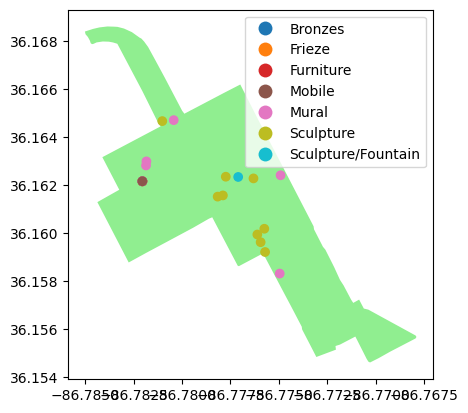

In [22]:
# Plot the urban_polygon as ax 
ax = urban_polygon.plot(color = 'lightgreen')
# Add a plot of the urban_art and show it
urban_art.plot(ax = ax, column = 'Type', legend = True);
plt.show()

In [23]:
print('ok_')

ok_
